In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all our plots
sns.set_style('whitegrid')

# --- 1. Load the Data ---
# The path is relative to the root of your project folder
file_path = '../data/customer_churn.csv'
df = pd.read_csv(file_path)

# --- 2. Initial Inspection ---
print("--- First 5 Rows ---")
print(df.head(10))

print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())

--- First 5 Rows ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service   

In [8]:
# Search missing values in dataframe
print("\n--- Missing Values in Each Column ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Dealing with missing values
# For simplicity, we will drop rows with missing values
df.dropna(inplace=True)
print("\n--- Dataset Info After Dropping Missing Values ---")
print(df.info())

# checking for duplicates rows and columns

print("\n--- Check for Duplicate Columns ---")
duplicate_columns = df.columns[df.columns.duplicated()]
print("\n--- Check for Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#Checking missing values again after dropping
print("\n--- Missing Values After Dropping ---")
print(df.isnull().sum())



--- Missing Values in Each Column ---
Series([], dtype: int64)

--- Dataset Info After Dropping Missing Values ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 no

In [ ]:
# Applying Basic statistics
print("\n--- Basic Statistics ---")
print(df.describe())





--- Basic Statistics ---
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000



--- Target Variable Class Distribution ---
Churn
No     5163
Yes    1869
Name: count, dtype: int64

--- Correlation Matrix ---


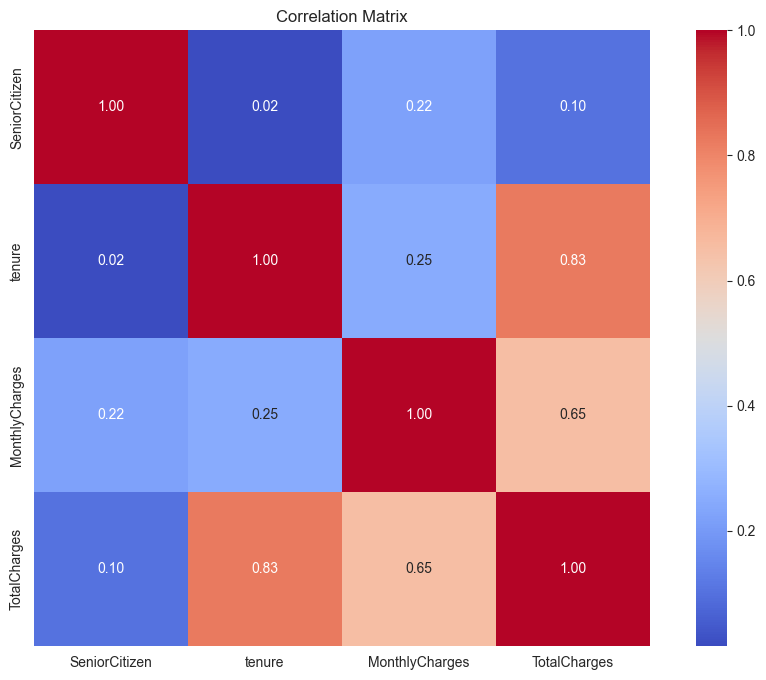

C:\Users\Jagdish\AppData\Local\Temp\ipykernel_18332\2721999344.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')
C:\Users\Jagdish\AppData\Local\Temp\ipykernel_18332\2721999344.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Churn', 'Churn'])


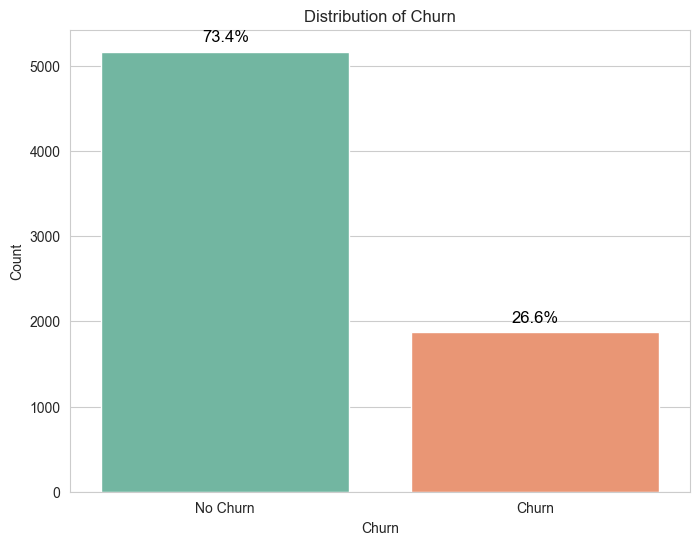

In [ ]:
# Understanding Target Variable with class balancing
print("\n--- Target Variable Class Distribution ---")
target_counts = df['Churn'].value_counts()
print(target_counts)

# Checking which features are influential for the target variable
print("\n--- Correlation Matrix ---")
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# The correlation matrix shows the relationships between numerical features and the target variable 'Churn'.
# As per results, we can see that 'MonthlyCharges' and 'TotalCharges' have a strong correlation with the target variable 'Churn'.

# Visualizing the Target Variable Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
ax.set_xticklabels(['No Churn', 'Churn'])

# Add percentage labels on top of bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# After class blancing, we can see that it is imbalanced, with a higher number of non-churned customers compared to churned customers.


In [13]:
# Checking for unique values in categorical columns
print("\n--- Unique Values in Categorical Columns ---")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")

    


--- Unique Values in Categorical Columns ---
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


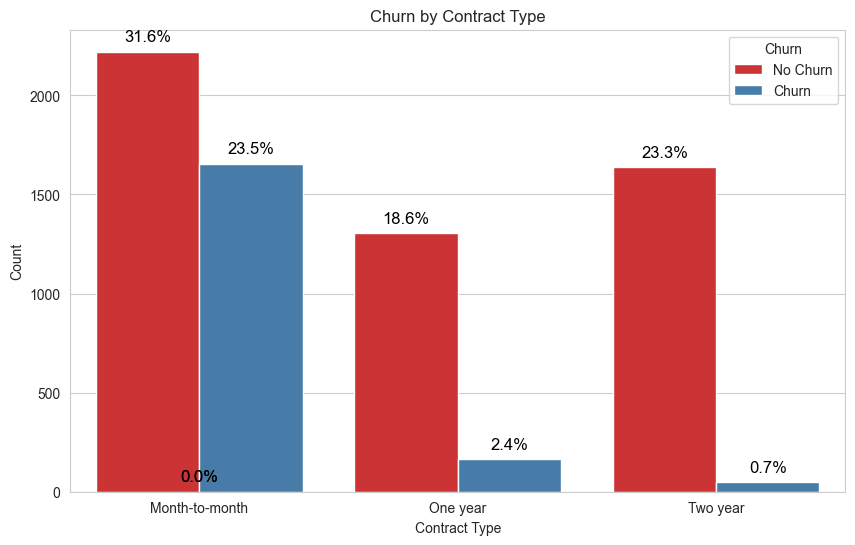

In [18]:
# Find which features have strong relationships with churn.
# Start with contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    plt.gca().annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# After visualizing the contract type, we can see that customers with month-to-month contracts have a higher churn rate compared to those with one-year or two-year contracts.


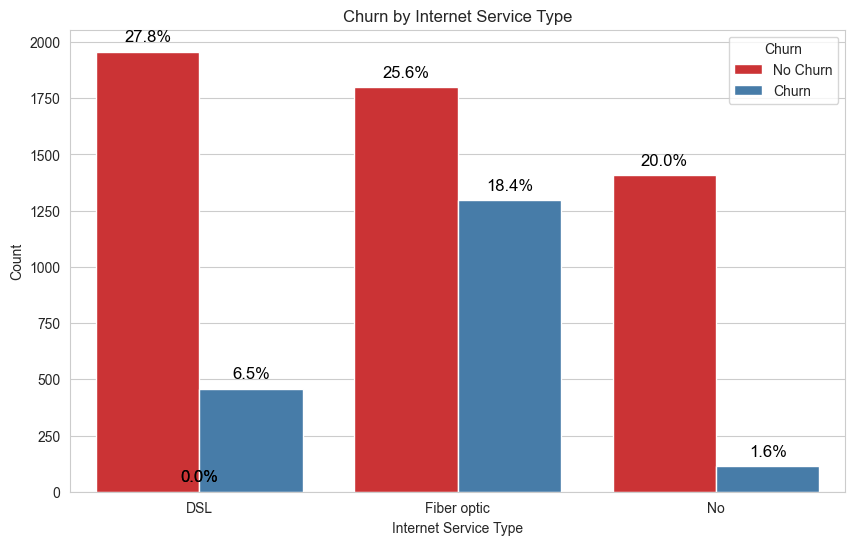

In [ ]:
# Secondly, we will check internet service type
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    plt.gca().annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# After visualizing the internet service type, we can see that customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

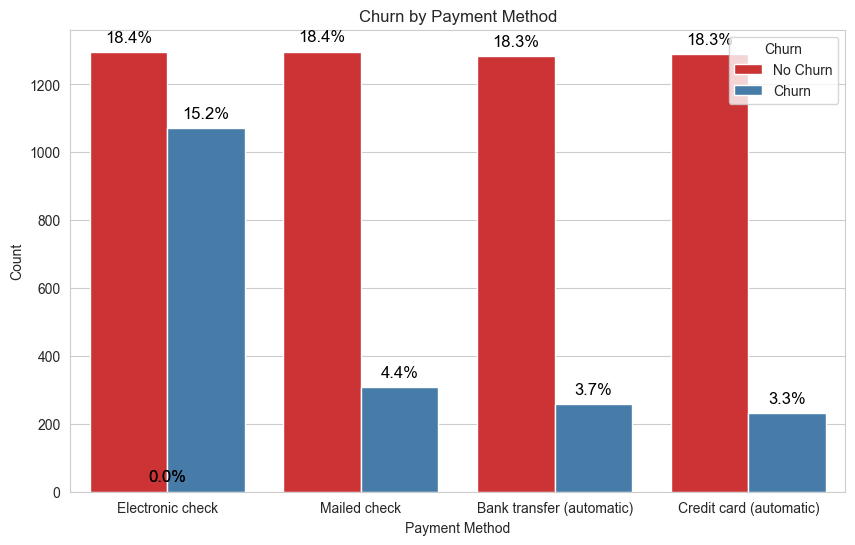

In [ ]:
# Thirdly, we will check payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    plt.gca().annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# After visualizing the payment method, we can see that customers who pay by electronic check have a higher churn rate compared to those who pay by other methods.

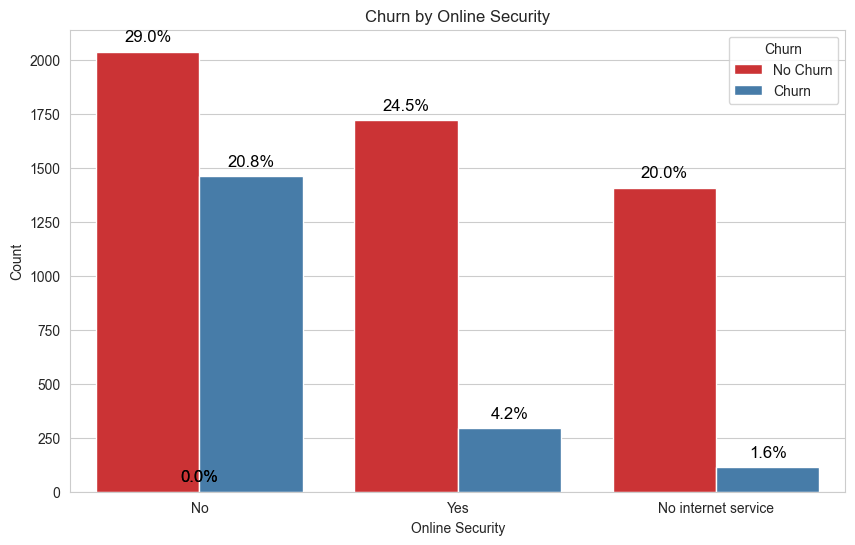

In [ ]:
# Fourth, we will check for online security/tech support
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count') 
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    plt.gca().annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# After visualizing the online security, we can see that customers who do not have online security have a higher churn rate compared to those who have it.


--- Grouped DataFrame with Churn Rate ---
          Contract InternetService              PaymentMethod  \
0   Month-to-month             DSL  Bank transfer (automatic)   
1   Month-to-month             DSL  Bank transfer (automatic)   
2   Month-to-month             DSL    Credit card (automatic)   
3   Month-to-month             DSL    Credit card (automatic)   
4   Month-to-month             DSL           Electronic check   
5   Month-to-month             DSL           Electronic check   
6   Month-to-month             DSL               Mailed check   
7   Month-to-month             DSL               Mailed check   
8   Month-to-month     Fiber optic  Bank transfer (automatic)   
9   Month-to-month     Fiber optic  Bank transfer (automatic)   
10  Month-to-month     Fiber optic    Credit card (automatic)   
11  Month-to-month     Fiber optic    Credit card (automatic)   
12  Month-to-month     Fiber optic           Electronic check   
13  Month-to-month     Fiber optic           El

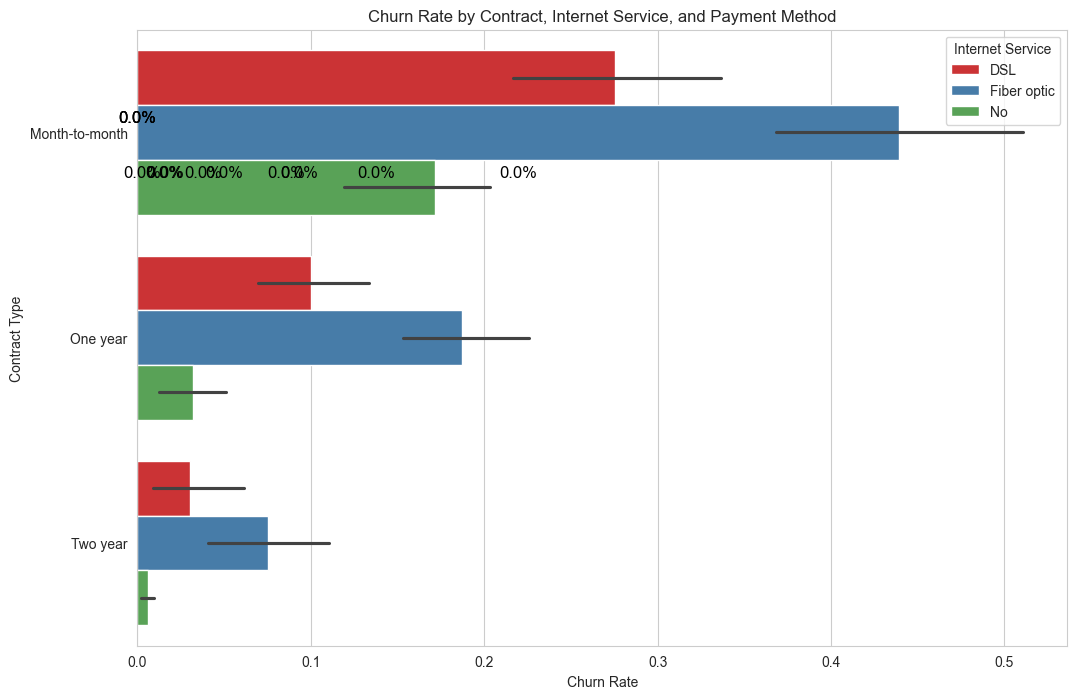

In [ ]:
# Now analyzing in group churn rate by multiple features
# Grouping by multiple features to analyze churn rate
grouped_df = df.groupby(['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']).size().reset_index(name='Count')
# Convert 'Churn' to numeric for mean calculation
churn_numeric = df['Churn'].map({'No': 0, 'Yes': 1})
grouped_df['Churn Rate'] = df.groupby(['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity'])['Churn'].apply(lambda x: x.map({'No': 0, 'Yes': 1}).mean()).values
# Displaying the grouped DataFrame
print("\n--- Grouped DataFrame with Churn Rate ---")
print(grouped_df)
# Visualizing the grouped churn rate
plt.figure(figsize=(12, 8))
sns.barplot(x='Churn Rate', y='Contract', hue='InternetService', data=grouped_df, palette='Set1')
plt.title('Churn Rate by Contract, Internet Service, and Payment Method')
plt.xlabel('Churn Rate')
plt.ylabel('Contract Type')
plt.legend(title='Internet Service', loc='upper right')
# Add percentage labels on top of bars
total = len(df)
for p in plt.gca().patches:
    count = int(p.get_width())
    percentage = 100 * count / total
    plt.gca().annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# After analyzing the churn rate by multiple features, we can see that customers with month-to-month contracts, fiber optic internet service, and electronic check payment method have the highest churn rates. Additionally, customers without online security also tend to have a higher churn rate.

# Noting the key insights:
# 1. Customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts.
# 2. Fiber optic internet service users exhibit a higher churn rate than those with DSL or no internet service.
# 3. Customers who pay via electronic check have a higher churn rate compared to other payment methods.
# 4. The absence of online security is associated with a higher churn rate.
# 5. The dataset is imbalanced, with a higher number of non-churned customers compared to churned customers.
# 6. The correlation matrix indicates that 'MonthlyCharges' and 'TotalCharges' have a strong correlation with the target variable 'Churn'.
# 7. The dataset contains no missing values after dropping rows with missing values, and there are no duplicate rows or columns.
# 8. The unique values in categorical columns provide insights into the different categories present in the dataset.
# 9. The grouped churn rate analysis reveals that certain combinations of features (e.g., month-to-month contracts, fiber optic internet service, electronic check payment method, and lack of online security) are associated with higher churn rates.
# 10. The visualizations provide a clear understanding of the relationships between features and the target variable 'Churn', helping to identify potential areas for customer retention strategies.
# The analysis provides a comprehensive understanding of the factors influencing customer churn, which can be used to develop targeted strategies for customer retention.
# --- End of Analysis ---

In [24]:
# --- 3. Save the Cleaned Data ---
# Save the cleaned DataFrame to a new CSV file
output_file_path = '../data/cleaned_customer_churn.csv'
df.to_csv(output_file_path, index=False)
print(f"\n--- Cleaned data saved to {output_file_path} ---")



--- Cleaned data saved to ../data/cleaned_customer_churn.csv ---


In [25]:
# Exploring Numrical Features Now

# Checking numerical features
numerical_features = df.select_dtypes(include=['number']).columns
print("\n--- Numerical Features ---")
print(numerical_features)


--- Numerical Features ---
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


C:\Users\Jagdish\AppData\Local\Temp\ipykernel_18332\801098370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')


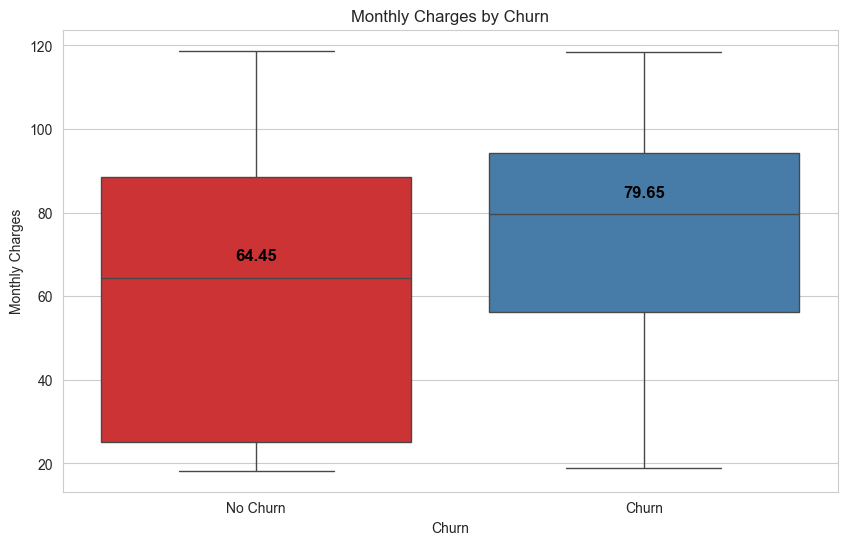

In [ ]:
# Find which features have strong relationships with churn fro numerical features

# First, we will check Monthly Charges
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Annotate median values on each box
medians = df.groupby('Churn')['MonthlyCharges'].median()
for i, median in enumerate(medians):
    ax.annotate(f'{median:.2f}', xy=(i, median), xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

# After visualizing the Monthly Charges, we can see that customers who churn tend to have higher monthly charges compared to those who do not churn.

C:\Users\Jagdish\AppData\Local\Temp\ipykernel_18332\632623988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set1')


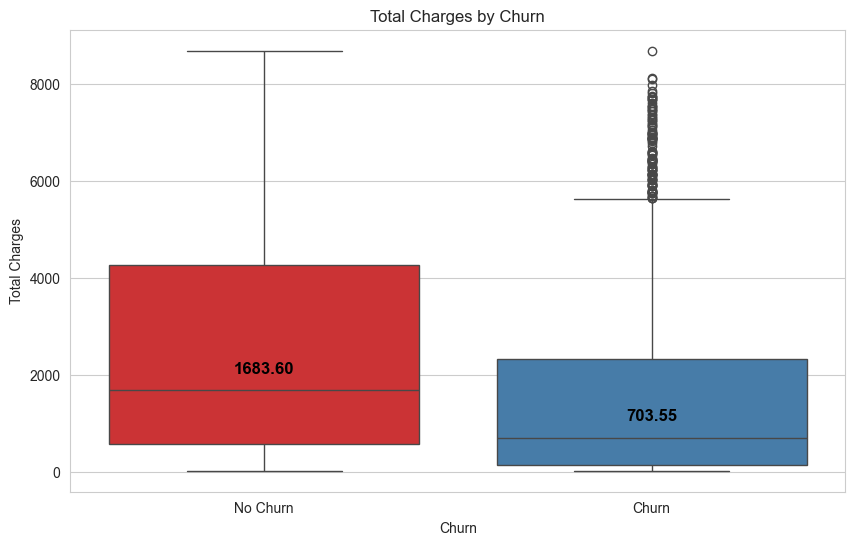

In [ ]:
# Second, we will check Total Charges
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set1')
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
# Annotate median values on each box
medians = df.groupby('Churn')['TotalCharges'].median()
for i, median in enumerate(medians):
    ax.annotate(f'{median:.2f}', xy=(i, median), xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.show()

# After visualizing the Total Charges, we can see that customers who churn tend to have higher total charges compared to those who do not churn.

C:\Users\Jagdish\AppData\Local\Temp\ipykernel_18332\1086789931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')


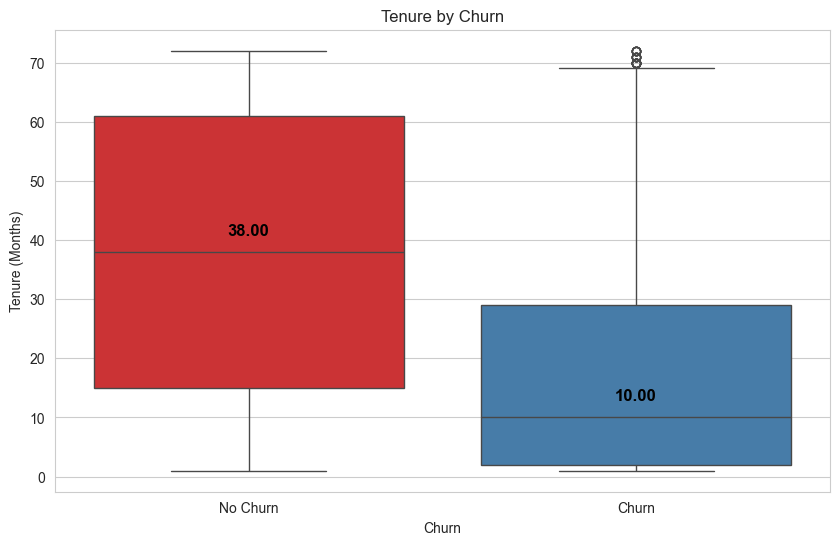

In [ ]:
# Third, we will check Tenure
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
# Annotate median values on each box
medians = df.groupby('Churn')['tenure'].median()
for i, median in enumerate(medians):
    ax.annotate(f'{median:.2f}', xy=(i, median), xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.show()

# After visualizing the Tenure, we can see that customers who churn tend to have shorter tenures compared to those who do not churn.

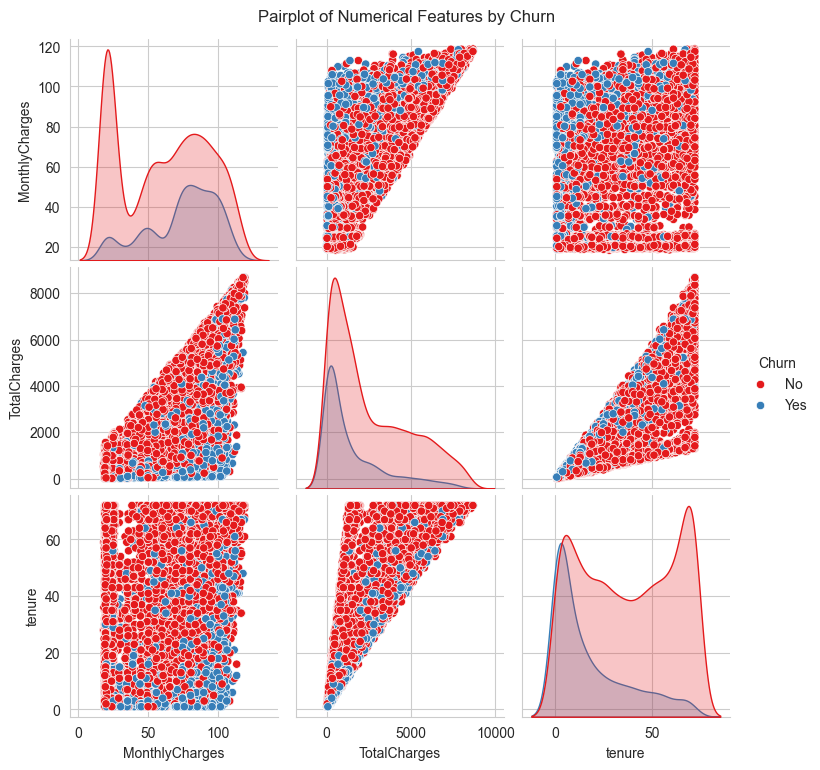

In [ ]:
# Now we will check the relationship between numerical features and churn using a pairplot
sns.pairplot(df, hue='Churn', vars=['MonthlyCharges', 'TotalCharges', 'tenure'], palette='Set1')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

# The pairplot shows the relationships between the numerical features (MonthlyCharges, TotalCharges, and Tenure) and the target variable (Churn).
# We can see that there are distinct clusters for churned and non-churned customers, indicating that these numerical features have a strong relationship with churn.

# The analysis of numerical features reveals that:
# 1. Customers who churn tend to have higher monthly charges compared to those who do not churn.
# 2. Customers who churn tend to have higher total charges compared to those who do not churn.
# 3. Customers who churn tend to have shorter tenures compared to those who do not churn.
# 4. The pairplot shows distinct clusters for churned and non-churned customers, indicating that the numerical features have a strong relationship with churn.
# The insights from the numerical features can be used to develop targeted strategies for customer retention, such as offering discounts or incentives to customers with high monthly charges or total charges, or providing additional support to customers with shorter tenures.


# Customer Churn Analysis
This analysis explores the customer churn dataset to identify key factors influencing customer churn. The dataset contains various features related to customer demographics, service usage, and churn status.
## 1. Data Loading and Initial Inspection
The dataset was loaded from a CSV file and inspected for the first few rows, data types, and summary statistics. Missing values were checked and handled by dropping rows with missing values.
## 2. Data Cleaning
The dataset was cleaned by dropping rows with missing values and checking for duplicate rows and columns. No duplicates were found, and the dataset was ready for analysis.
## 3. Target Variable Analysis
The target variable 'Churn' was analyzed for class distribution, revealing an imbalanced dataset with more non-churned customers than churned customers. The correlation matrix showed strong relationships between numerical features and the target variable.
## 4. Categorical Feature Analysis
Categorical features such as 'Contract', 'InternetService', 'PaymentMethod', and 'OnlineSecurity' were analyzed for their relationship with churn. Visualizations revealed that:
- Customers with month-to-month contracts have a higher churn rate.
- Fiber optic internet service users exhibit a higher churn rate.
- Customers who pay via electronic check have a higher churn rate.
- The absence of online security is associated with a higher churn rate.
## 5. Grouped Churn Rate Analysis
Grouped analysis of churn rate by multiple features revealed that certain combinations (e.g., month-to-month contracts, fiber optic internet service, electronic check payment method, and lack of online security) are associated with higher churn rates.
## 6. Numerical Feature Analysis
Numerical features such as 'MonthlyCharges', 'TotalCharges', and 'Tenure' were analyzed for their relationship with churn. Visualizations showed that:
- Customers who churn tend to have higher monthly charges.
- Customers who churn tend to have higher total charges.
- Customers who churn tend to have shorter tenures.
## 7. Pairplot Analysis
A pairplot was created to visualize the relationships between numerical features and churn, showing distinct clusters for churned and non-churned customers.
## 8. Key Insights
The analysis revealed several key insights:
1. Month-to-month contracts, fiber optic internet service, and electronic check payment method are associated with higher churn rates.
2. The absence of online security is linked to higher churn rates.
3. Customers who churn tend to have higher monthly charges, total charges, and shorter tenures.
4. The dataset is imbalanced, with more non-churned customers than churned customers.
5. The numerical features have a strong relationship with churn, as shown by the pairplot.
## 9. Conclusion
The analysis provides a comprehensive understanding of the factors influencing customer churn, which can be used to develop targeted strategies for customer retention. The insights gained from this analysis can help businesses identify at-risk customers and implement measures to reduce churn.
"""